**Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
file_path = r"C:/Users/Ace/Downloads/Jyputer/practical/Internship Project/Dataset/Yelp Restaurant Reviews.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [ ]:
df.shape

(19896, 4)

In [ ]:
df.isna().sum()

Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64

**Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Yelp URL     19896 non-null  object        
 1   Rating       19896 non-null  int64         
 2   Date         19896 non-null  datetime64[ns]
 3   Review Text  19896 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 621.9+ KB


In [ ]:
df.duplicated().sum()

0

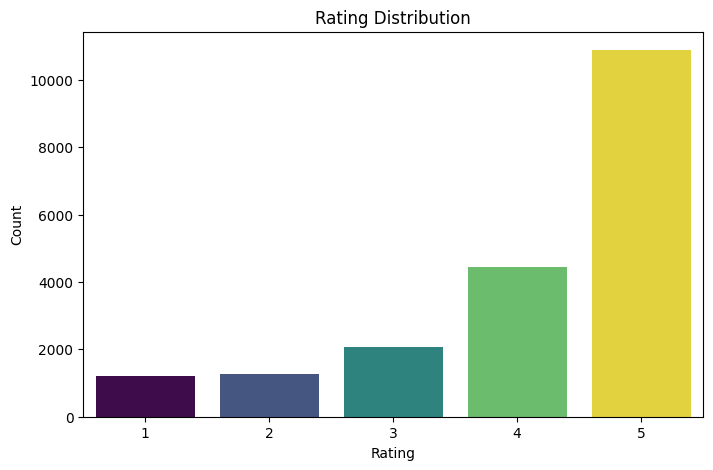

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Rating', data = df,hue = 'Rating', palette = 'viridis', legend = False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Cleaned_Text'] = df['Review Text'].str.lower()

In [ ]:
import string
import re

In [ ]:
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

def remove_noise(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  return text

df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_punctuation)
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_noise)

df.head()

,Yelp URL,Rating,Date,Review Text,Cleaned_Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,all i can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,nice little local place for ice creammy favori...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,a delicious treat on a hot day staff was very ...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,this was great service and a fun crew i got th...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,this is one of my favorite places to get ice c...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def remove_stopwords(text):
  tokens = word_tokenize(text)
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
  return " ".join(filtered_tokens)

df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_stopwords)

df.head()

,Yelp URL,Rating,Date,Review Text,Cleaned_Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,say good ice cream would sure recommend cookie...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,nice little local place ice creammy favorite p...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,delicious treat hot day staff friendly helpful...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,great service fun crew got banana cream pie ch...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,one favorite places get ice cream cu area bit ...


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('tagsets')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

def apply_lemmatization(text):
  tokens = text.split()
  pos_tags = nltk.pos_tag(tokens)
  lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
  return " ".join(lemmatized_tokens)

df['Cleaned_Text'] = df['Cleaned_Text'].apply(apply_lemmatization)

df.head()

,Yelp URL,Rating,Date,Review Text,Cleaned_Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,say good ice cream would sure recommend cooky ...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,nice little local place ice creammy favorite p...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,delicious treat hot day staff friendly helpful...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,great service fun crew get banana cream pie ch...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,one favorite place get ice cream cu area bit d...


In [ ]:
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
from collections import Counter

all_words = " ".join(df['Cleaned_Text']).split()

word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

Words, counts = zip(*common_words)

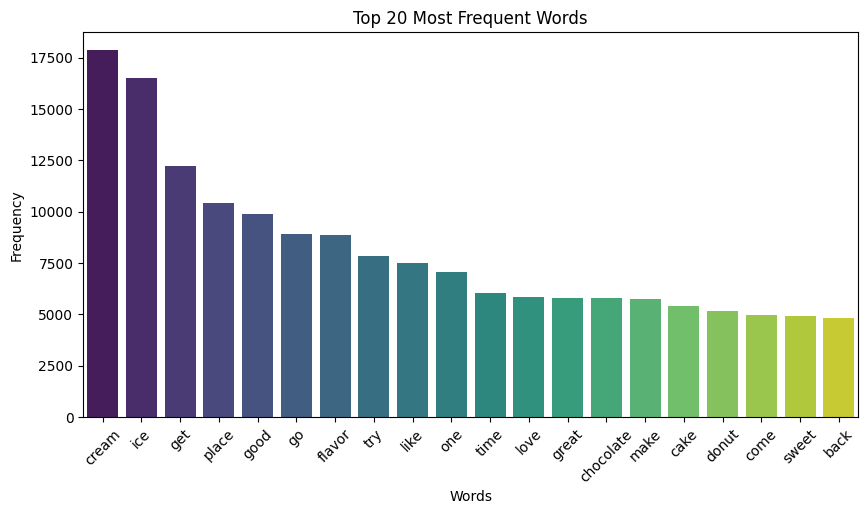

In [ ]:
plt.figure(figsize =(10, 5))
sns.barplot(x = list(Words), y = list(counts), hue=list(Words), palette = 'viridis', legend = False)
plt.xticks(rotation = 45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.show()

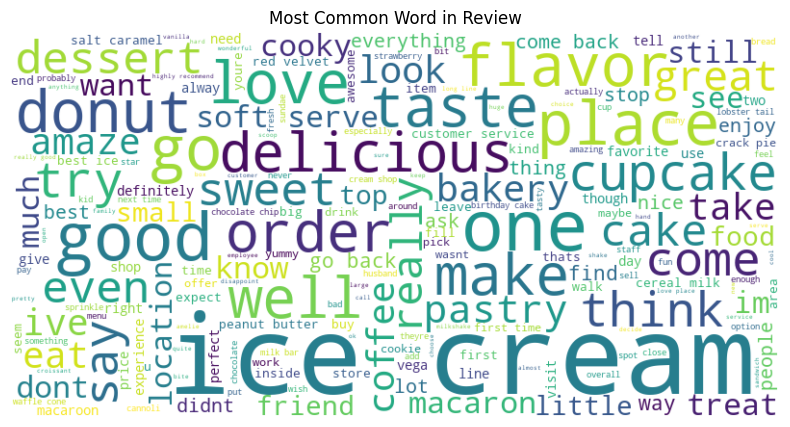

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['Cleaned_Text'])

word_cloud = WordCloud(width = 800, height = 400, background_color='white', colormap = 'viridis').generate(text)

plt.figure(figsize = (10, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Common Word in Review')
plt.show()

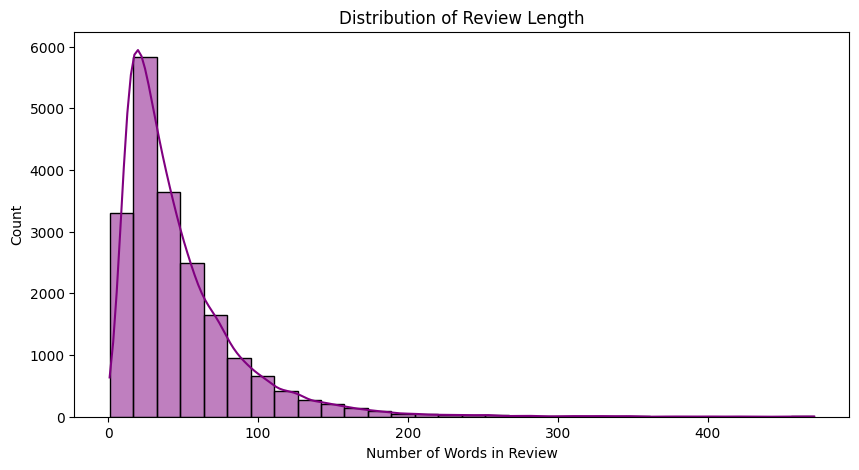

In [ ]:
df['Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

plt.figure(figsize= (10, 5))
sns.histplot(df['Length'], bins = 30, kde = True, color = 'Purple')
plt.xlabel("Number of Words in Review")
plt.ylabel("Count")
plt.title("Distribution of Review Length")
plt.show()

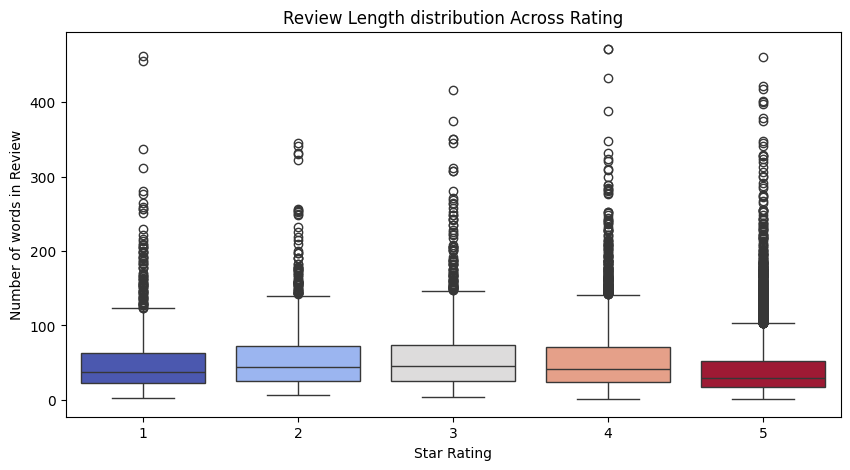

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = df["Rating"], y = df["Length"], hue = df['Rating'], palette='coolwarm', legend = False)
plt.xlabel("Star Rating")
plt.ylabel("Number of words in Review")
plt.title("Review Length distribution Across Rating")
plt.show()

**Feature Engineering**

In [ ]:
from textblob import TextBlob

In [ ]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivety'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df.head()

,Yelp URL,Rating,Date,Review Text,Cleaned_Text,Length,Polarity,Subjectivety
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,say good ice cream would sure recommend cooky ...,12,0.773333,0.816296
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,nice little local place ice creammy favorite p...,31,0.273661,0.575000
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,delicious treat hot day staff friendly helpful...,16,0.268750,0.666667
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,great service fun crew get banana cream pie ch...,38,0.381250,0.586364
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,one favorite place get ice cream cu area bit d...,82,0.354082,0.643793


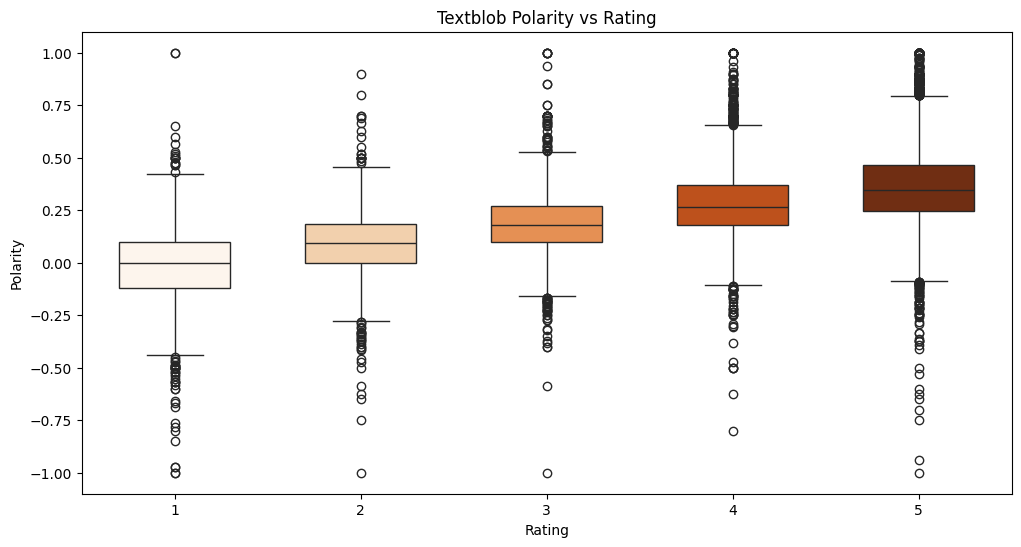

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df['Rating'], y = df['Polarity'], hue = df['Rating'], palette = 'Oranges', width = 0.6, legend = False)
plt.title('Textblob Polarity vs Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.show()

In [ ]:
import scipy.stats as stats
pearson_text = stats.pearsonr(df['Rating'], df['Polarity'])
spearman_text = stats.spearmanr(df['Rating'], df['Polarity'])

print(f'Pearson Correlation: {pearson_text[0]:.4f}')
print(f'Spearman Correlation: {spearman_text[0]:.4f}')

Pearson Correlation: 0.5205
Spearman Correlation: 0.4996


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_tfidf = tfidf.fit_transform(df['Cleaned_Text']).toarray()

X = np.hstack((X_tfidf, df[['Polarity', 'Subjectivety']].values))
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

bagging_svm = BaggingClassifier(estimator=SVC(kernel='rbf'), n_estimators=10, random_state=42)

bagging_svm.fit(X_train, y_train)

y_pred = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("SVM Classification Report: ", classification_report(y_test, y_pred))

Accuracy: 0.6643
SVM Classification Report:                precision    recall  f1-score   support

           1       0.59      0.62      0.60       243
           2       0.40      0.26      0.32       256
           3       0.46      0.33      0.39       414
           4       0.49      0.33      0.40       890
           5       0.75      0.91      0.82      2177

    accuracy                           0.66      3980
   macro avg       0.54      0.49      0.51      3980
weighted avg       0.63      0.66      0.64      3980

